In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
df=pd.read_csv("/Movie_Top.csv")

In [111]:
df.head()

,Unnamed: 0,id,overview,release_date,title,vote_average,vote_count,popularity
0,0,278,Imprisoned in the 1940s for the double murder ...,1994-09-23,The Shawshank Redemption,8.711,29216,NaN
1,1,238,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,The Godfather,8.700,22064,NaN
2,2,240,In the continuing saga of the Corleone crime f...,1974-12-20,The Godfather Part II,8.600,13338,NaN
3,3,424,The true story of how businessman Oskar Schind...,1993-12-15,Schindler's List,8.566,16859,NaN
4,4,389,The defense and the prosecution have rested an...,1957-04-10,12 Angry Men,8.549,9525,NaN


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60000 non-null  int64  
 1   id            60000 non-null  int64  
 2   overview      59994 non-null  object 
 3   release_date  59988 non-null  object 
 4   title         60000 non-null  object 
 5   vote_average  60000 non-null  float64
 6   vote_count    60000 non-null  int64  
 7   popularity    20000 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 3.7+ MB


In [113]:
df.columns

Index(['Unnamed: 0', 'id', 'overview', 'release_date', 'title', 'vote_average',
       'vote_count', 'popularity'],
      dtype='object')

In [114]:
df.drop("Unnamed: 0",axis=1,inplace=True)


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            60000 non-null  int64  
 1   overview      59994 non-null  object 
 2   release_date  59988 non-null  object 
 3   title         60000 non-null  object 
 4   vote_average  60000 non-null  float64
 5   vote_count    60000 non-null  int64  
 6   popularity    20000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 3.2+ MB


In [116]:
df=df.drop('popularity',axis=1)

In [117]:
df.nunique()

,0
id,9865
overview,9861
release_date,6168
title,9511
vote_average,2597
vote_count,3611


In [118]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            60000 non-null  int64         
 1   overview      59994 non-null  object        
 2   release_date  59988 non-null  datetime64[ns]
 3   title         60000 non-null  object        
 4   vote_average  60000 non-null  float64       
 5   vote_count    60000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 2.7+ MB


In [119]:
df.drop_duplicates(inplace=True)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9879 entries, 0 to 57921
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            9879 non-null   int64         
 1   overview      9878 non-null   object        
 2   release_date  9877 non-null   datetime64[ns]
 3   title         9879 non-null   object        
 4   vote_average  9879 non-null   float64       
 5   vote_count    9879 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 540.3+ KB


In [121]:
df.isnull().sum()

,0
id,0
overview,1
release_date,2
title,0
vote_average,0
vote_count,0


In [122]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9876 entries, 0 to 57921
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            9876 non-null   int64         
 1   overview      9876 non-null   object        
 2   release_date  9876 non-null   datetime64[ns]
 3   title         9876 non-null   object        
 4   vote_average  9876 non-null   float64       
 5   vote_count    9876 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 540.1+ KB


In [123]:
df.describe()

,id,release_date,vote_average,vote_count
count,9.876000e+03,9876,9876.000000,9876.000000
mean,2.176772e+05,2005-01-03 05:11:53.001214976,6.708940,2065.201600
min,2.000000e+00,1902-06-15 00:00:00,5.294000,300.000000
25%,1.024675e+04,1997-10-30 00:00:00,6.200000,473.000000
50%,4.116250e+04,2010-03-19 00:00:00,6.700000,862.000000
75%,3.964318e+05,2017-08-21 00:00:00,7.200250,2060.500000
max,1.426776e+06,2025-11-05 00:00:00,8.711000,38241.000000
std,2.884665e+05,NaN,0.681449,3294.218248


In [124]:
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month
df['overview_len'] = df['overview'].str.len()
df['overview_words'] = df['overview'].str.split().str.len()

In [125]:
df['log_votes'] = np.log1p(df['vote_count'])
df['popularity_score'] = df['vote_average'] * df['log_votes']

## Top 20 Most Voted Movies -->

In [126]:
top_pop = df.sort_values('vote_count', ascending=False).head(20)
top_pop

,id,overview,release_date,title,vote_average,vote_count,year,month,overview_len,overview_words,log_votes,popularity_score
15,157336,The adventures of a group of explorers who mak...,2014-11-05,Interstellar,8.462,38241,2014,11,198,33,10.551690,89.288398
40,27205,"Cobb, a skilled thief who commits corporate es...",2010-07-15,Inception,8.370,38223,2010,7,280,44,10.551219,88.313702
6,155,Batman raises the stakes in his war on crime. ...,2008-07-16,The Dark Knight,8.524,34701,2008,7,396,67,10.454553,89.114606
503,24428,When an unexpected enemy emerges and threatens...,2012-04-25,The Avengers,7.852,33975,2012,4,297,47,10.433410,81.923133
1047,19995,"In the 22nd century, a paraplegic Marine is di...",2009-12-15,Avatar,7.593,32813,2009,12,175,28,10.398611,78.956650
966,293660,The origin story of former Special Forces oper...,2016-02-09,Deadpool,7.622,32067,2016,2,334,54,10.375614,79.082929
91,299536,As the Avengers and their allies have continue...,2018-04-25,Avengers: Infinity War,8.235,31140,2018,4,490,87,10.346281,85.201620
20,550,A ticking-time-bomb insomniac and a slippery s...,1999-10-15,Fight Club,8.438,30990,1999,10,295,45,10.341452,87.261173
11,680,"A burger-loving hit man, his philosophical par...",1994-09-10,Pulp Fiction,8.488,29277,1994,9,239,36,10.284592,87.295614
0,278,Imprisoned in the 1940s for the double murder ...,1994-09-23,The Shawshank Redemption,8.711,29216,1994,9,392,69,10.282506,89.570910


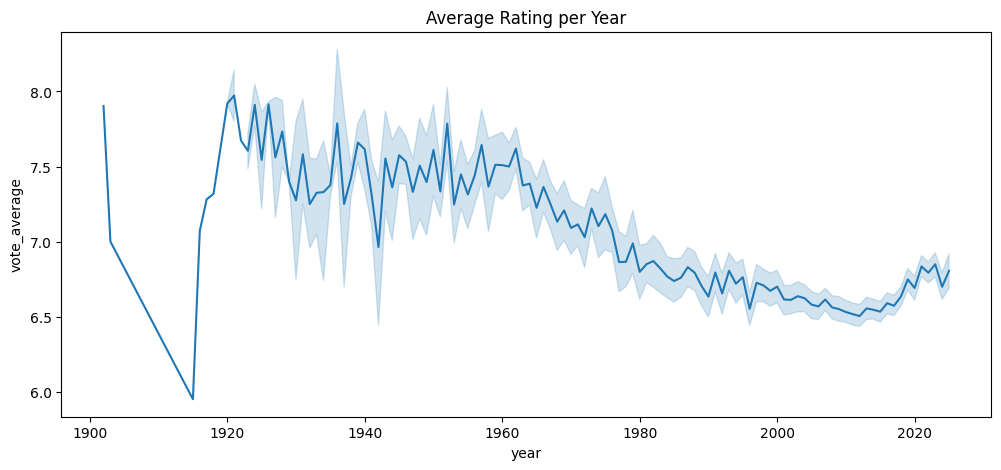

In [127]:
plt.figure(figsize=(12,5))
sns.lineplot(x='year', y='vote_average', data=df)
plt.title("Average Rating per Year")
plt.show()


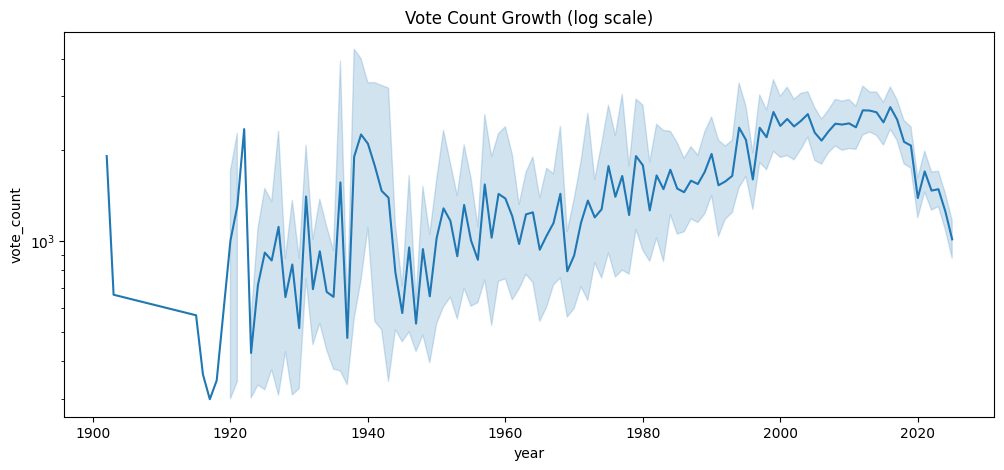

In [128]:
plt.figure(figsize=(12,5))
sns.lineplot(x='year', y='vote_count', data=df)
plt.yscale('log')
plt.title("Vote Count Growth (log scale)")
plt.show()


In [129]:
filter_popular = df[df['vote_count'] > 1000]
top_rated = filter_popular.sort_values('vote_average', ascending=False).head(20)
filter_popular

,id,overview,release_date,title,vote_average,vote_count,year,month,overview_len,overview_words,log_votes,popularity_score
0,278,Imprisoned in the 1940s for the double murder ...,1994-09-23,The Shawshank Redemption,8.711,29216,1994,9,392,69,10.282506,89.570910
1,238,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,The Godfather,8.700,22064,1972,3,307,48,10.001748,87.015207
2,240,In the continuing saga of the Corleone crime f...,1974-12-20,The Godfather Part II,8.600,13338,1974,12,222,39,9.498447,81.686647
3,424,The true story of how businessman Oskar Schind...,1993-12-15,Schindler's List,8.566,16859,1993,12,163,29,9.732699,83.370302
4,389,The defense and the prosecution have rested an...,1957-04-10,12 Angry Men,8.549,9525,1957,4,332,58,9.161780,78.324059
...,...,...,...,...,...,...,...,...,...,...,...,...
43508,12783,A chronicle of the life of 18th century aristo...,2008-09-05,The Duchess,7.000,1740,2008,9,149,23,7.462215,52.235505
46332,457335,An ordinary guy suddenly finds himself forced ...,2020-02-27,Guns Akimbo,6.432,2454,2020,2,267,43,7.805882,50.207433
46339,605116,"An ex-soldier, a teen and a cop collide in New...",2020-08-14,Project Power,6.431,2965,2020,8,151,27,7.994970,51.415649
55632,375366,"In the future, a strange fungus has changed ne...",2016-09-23,The Girl with All the Gifts,6.567,2090,2016,9,224,39,7.645398,50.207327


In [130]:
top_popular = df.sort_values('popularity_score', ascending=False).head(20)
top_popular

,id,overview,release_date,title,vote_average,vote_count,year,month,overview_len,overview_words,log_votes,popularity_score
0,278,Imprisoned in the 1940s for the double murder ...,1994-09-23,The Shawshank Redemption,8.711,29216,1994,9,392,69,10.282506,89.570910
15,157336,The adventures of a group of explorers who mak...,2014-11-05,Interstellar,8.462,38241,2014,11,198,33,10.551690,89.288398
6,155,Batman raises the stakes in his war on crime. ...,2008-07-16,The Dark Knight,8.524,34701,2008,7,396,67,10.454553,89.114606
40,27205,"Cobb, a skilled thief who commits corporate es...",2010-07-15,Inception,8.370,38223,2010,7,280,44,10.551219,88.313702
11,680,"A burger-loving hit man, his philosophical par...",1994-09-10,Pulp Fiction,8.488,29277,1994,9,239,36,10.284592,87.295614
20,550,A ticking-time-bomb insomniac and a slippery s...,1999-10-15,Fight Club,8.438,30990,1999,10,295,45,10.341452,87.261173
1,238,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,The Godfather,8.700,22064,1972,3,307,48,10.001748,87.015207
13,13,A man with a low IQ has accomplished great thi...,1994-06-23,Forrest Gump,8.464,28848,1994,6,238,42,10.269831,86.923846
10,122,As armies mass for a final battle that will de...,2003-12-17,The Lord of the Rings: The Return of the King,8.490,25664,2003,12,523,94,10.152883,86.197981
25,120,"Young hobbit Frodo Baggins, after inheriting a...",2001-12-18,The Lord of the Rings: The Fellowship of the Ring,8.425,26598,2001,12,351,63,10.188629,85.839198


In [131]:
features = ['log_votes','overview_len','year']
X = df[features]
y = df['vote_average']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=300)
model.fit(X_train, y_train)

pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
rmse

np.float64(0.6499652967712146)